In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
df.drop("Person ID",axis= 1 ,inplace = True  )

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight','Normal')

In [ ]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df['Occupation'].unique()

array(['IT', 'Medical', 'Salesperson', 'Teacher', 'Scientist', 'Lawyer',
       'Manager'], dtype=object)

In [ ]:
df['Occupation'] = df['Occupation'].replace({'Software Engineer':'IT','Engineer':'IT','Nurse':'Medical','Doctor':'Medical','Sales Representative':'Salesperson','Accountant':'Salesperson'})

In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
disorder_counts = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)

In [ ]:
disorder_counts

Sleep Disorder,Insomnia,None,Sleep Apnea
Gender,,,
Female,36,82,67
Male,41,137,11


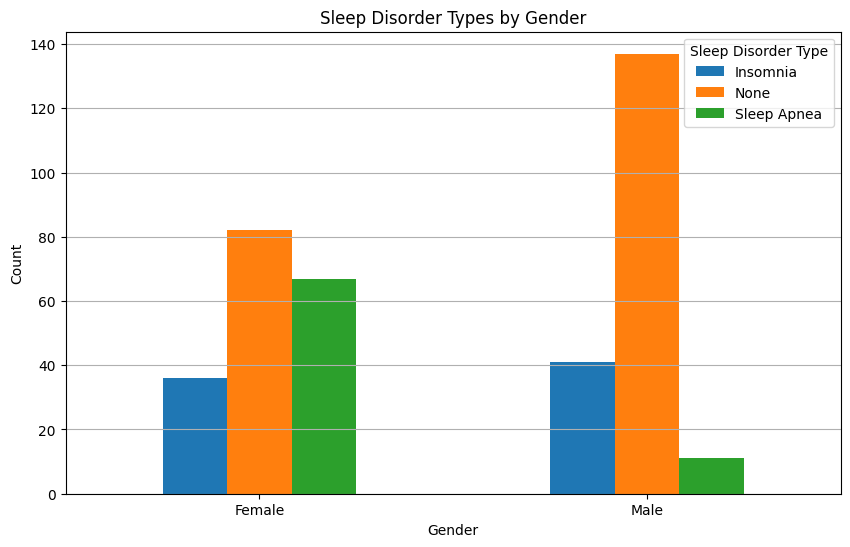

In [ ]:
disorder_counts.plot(kind='bar', figsize=(10, 6))

# Customize plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sleep Disorder Types by Gender')
plt.xticks(rotation=0)
plt.legend(title='Sleep Disorder Type')
plt.grid(axis='y')

plt.show()

<ipython-input-33-db0f8b58b152>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


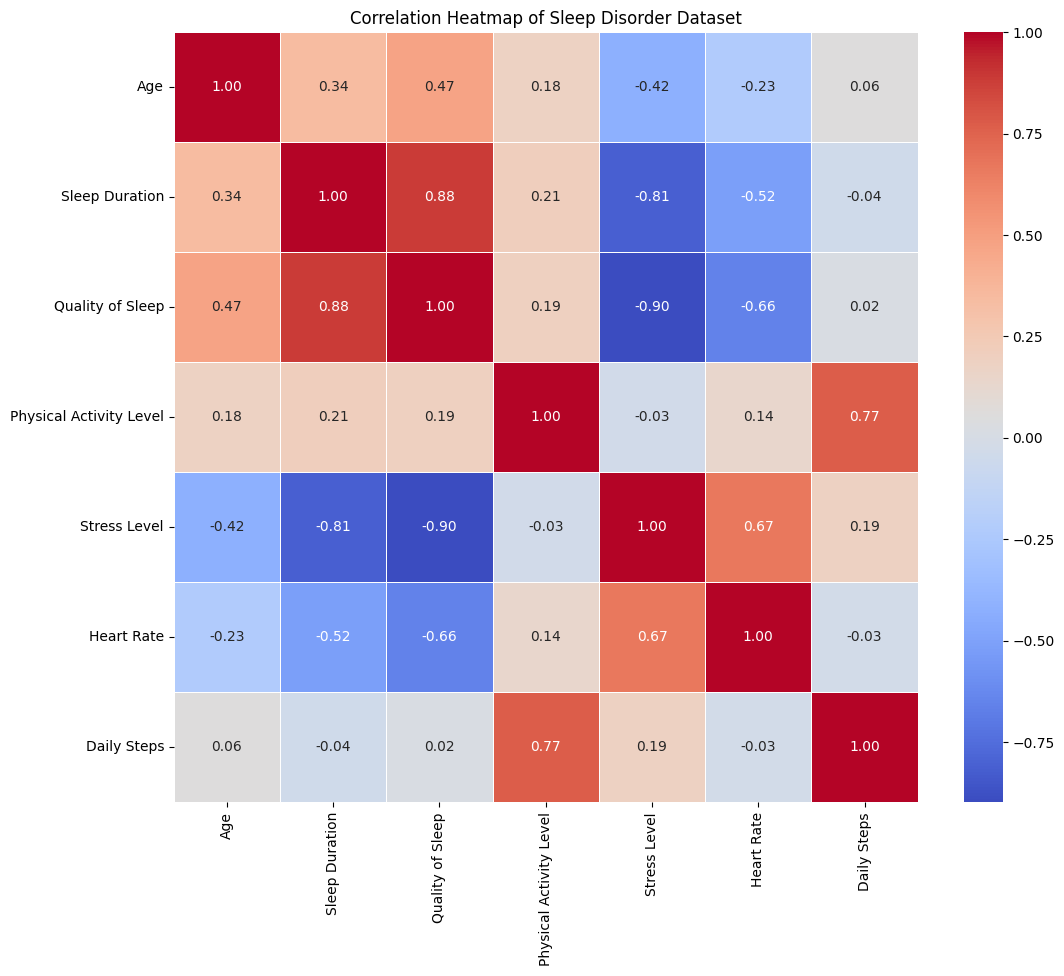

In [ ]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Sleep Disorder Dataset')
plt.show()

#R

In [ ]:
df <- read.csv("/content/Sleep_health_and_lifestyle_dataset.csv")

head(df)

,Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [ ]:
df <- df[, -1]

In [ ]:
head(df)

,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,Male,27,IT,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Medical,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Medical,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,IT,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [ ]:
df$Occupation[df$Occupation == "Engineer"] <- "IT"
df$Occupation[df$Occupation == "Software Engineer"] <- "IT"
df$Occupation[df$Occupation == "Nurse"] <- "Medical"
df$Occupation[df$Occupation == "Doctor"] <- "Medical"
df$Occupation[df$Occupation == "Sales Representative"] <- "Salesperson"
df$Occupation[df$Occupation == "Accountant"] <- "Salesperson"

In [ ]:
summary(df)

    Gender               Age         Occupation        Sleep.Duration 
 Length:374         Min.   :27.00   Length:374         Min.   :5.800  
 Class :character   1st Qu.:35.25   Class :character   1st Qu.:6.400  
 Mode  :character   Median :43.00   Mode  :character   Median :7.200  
                    Mean   :42.18                      Mean   :7.132  
                    3rd Qu.:50.00                      3rd Qu.:7.800  
                    Max.   :59.00                      Max.   :8.500  
 Quality.of.Sleep Physical.Activity.Level  Stress.Level   BMI.Category      
 Min.   :4.000    Min.   :30.00           Min.   :3.000   Length:374        
 1st Qu.:6.000    1st Qu.:45.00           1st Qu.:4.000   Class :character  
 Median :7.000    Median :60.00           Median :5.000   Mode  :character  
 Mean   :7.313    Mean   :59.17           Mean   :5.385                     
 3rd Qu.:8.000    3rd Qu.:75.00           3rd Qu.:7.000                     
 Max.   :9.000    Max.   :90.00          

In [ ]:
str(df)

'data.frame':	374 obs. of  12 variables:
 $ Gender                 : chr  "Male" "Male" "Male" "Male" ...
 $ Age                    : int  27 28 28 28 28 28 29 29 29 29 ...
 $ Occupation             : chr  "IT" "Medical" "Medical" "Salesperson" ...
 $ Sleep.Duration         : num  6.1 6.2 6.2 5.9 5.9 5.9 6.3 7.8 7.8 7.8 ...
 $ Quality.of.Sleep       : int  6 6 6 4 4 4 6 7 7 7 ...
 $ Physical.Activity.Level: int  42 60 60 30 30 30 40 75 75 75 ...
 $ Stress.Level           : int  6 8 8 8 8 8 7 6 6 6 ...
 $ BMI.Category           : chr  "Overweight" "Normal" "Normal" "Obese" ...
 $ Blood.Pressure         : chr  "126/83" "125/80" "125/80" "140/90" ...
 $ Heart.Rate             : int  77 75 75 85 85 85 82 70 70 70 ...
 $ Daily.Steps            : int  4200 10000 10000 3000 3000 3000 3500 8000 8000 8000 ...
 $ Sleep.Disorder         : chr  "None" "None" "None" "Sleep Apnea" ...


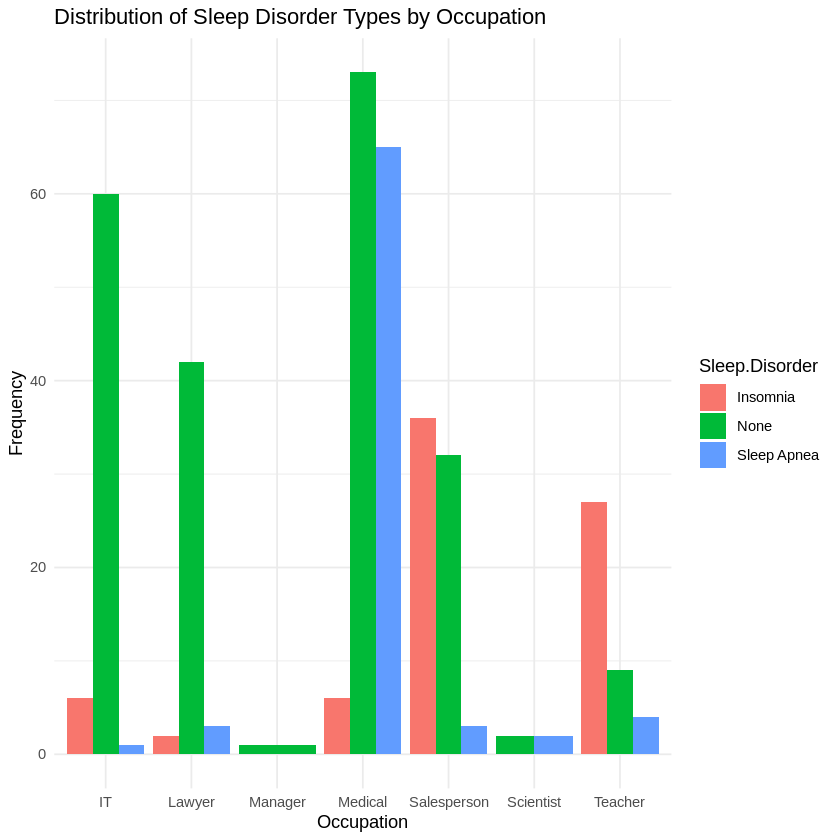

In [ ]:
library(ggplot2)

# Create ggplot
ggplot(df, aes(x = Occupation, fill = Sleep.Disorder)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of Sleep Disorder Types by Occupation",
       x = "Occupation", y = "Frequency") +
  theme_minimal()

In [ ]:
install.packages("sunburstR")
library(sunburstR)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘d3r’, ‘htmlwidgets’




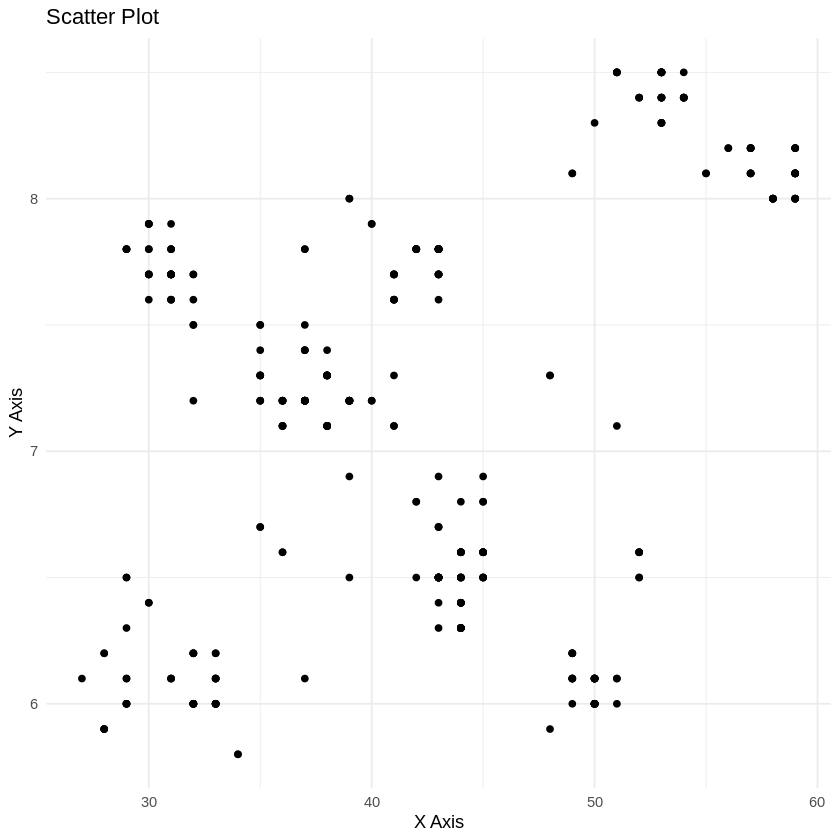

In [ ]:
# install.packages("plotly")
# install.packages("ggplot2") # This is optional but recommended for better aesthetics
# install.packages("tidyverse") # This is optional but useful for data manipulation

# library(plotly)
# library(ggplot2)
# library(tidyverse)

# Plot using ggplot2
ggplot(data = df, aes(x = Age, y = Sleep.Duration)) +
  geom_point() +
  labs(x = "X Axis", y = "Y Axis", title = "Scatter Plot") +
  theme_minimal()  # You can use any ggplot2 theme here

# Convert ggplot to plotly
plotly_plot <- ggplotly()

# Print the plot
print(plotly_plot)

ERROR: Error in cor(df): 'x' must be numeric
